<a href="https://colab.research.google.com/github/nevilshah444/FastAI/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient Descent Assignment:

Gradient descent (GD) is an optimisation algorithm used to find a local minima/maxima of a data provided as input.

Dataset: Salary_data

Link: https://www.kaggle.com/vihansp/salary-data

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# creating the dataframe
data = pd.read_csv("/content/drive/MyDrive/dataset/Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Years of Experience
x = data.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
# Salary Column
y = data.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
# defining the class for implementing linear regression
class LinearRegression():
    def __init__(self, rate, iter):
        self.rate = rate
        self.iter = iter

    # weights in gradient Descent
    def weights(self):            
        y_pred = self.predict(self.x) 

        # calculate gradients        
        dw = - (2 * (self.x.T ).dot(self.y - y_pred)) / self.m       
        db = - 2 * np.sum(self.y - y_pred) / self.m  


        # update weights      
        self.a = self.a - self.rate * dw      
        self.b = self.b - self.rate * db          
        return self

    # this function is intended to train the model
    def fit(self, x, y):          
        # no_of_training_examples, no_of_features          
        self.m, self.n = x.shape  

        # weight initialization

        self.a = np.zeros(self.n)          
        self.b = 0          
        self.x = x          
        self.y = y                

        # Gradient Descent
        for i in range(self.iter):              
            self.weights()              
        return self

    
    # for predicting while testing the data
    def predict(self, data):      
        return data.dot(self.a) + self.b

In [ ]:

# Splitting dataset into training dataset 60% and test set 40%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state =100)

In [ ]:
  
# Model training in linear regression 
model = LinearRegression(iter = 500, rate = 0.001)
model.fit(x_train, y_train)

In [ ]:
# Prediction on test set
y_pred = model.predict(x_test)
print("Values predicted for a given input are : ", np.round(y_pred[:5], 2)) 
print("Actual  values : ", y_test[:5])



Values predicted for a given input are :  [ 53868.71 127302.23 137430.99  58933.09  43739.94]
Actual  values :  [ 57189. 116969. 122391.  57081.  56642.]


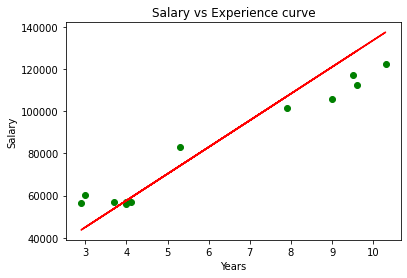

In [ ]:

# Visualization on test set after implementing Linear regression   
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, y_pred, color = 'red')
plt.title('Salary vs Experience curve')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

References:

1)https://www.kaggle.com/vihansp/salary-data

2)https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

3)https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
